# Exploratory data analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from colorama import Fore, Style
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import sys
import os

## 1. Loading the Data
- Importing the preprocessed data


In [34]:
data_path = os.path.join('..','raw_data', 'hotel_bookings_raw.csv')

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [22]:
# hotel -> 0 und 1
# is_canceled, is_repeated_guest -> keep like this
# stays_in_weekend_nights, stays_in_week_nights, lead_time, adults, adr, CPI_AVG, INFLATION, INFLATION_CHG, CSMR_SENT, UNRATE, INTRSRT, GDP, FUEL_PRCS, CPI_HOTELS, US_GINI, DIS_INC-> scale
# arrival_date_month -> change to numbers
# arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, children, babies, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, required_car_parking_spaces, total_of_special_requests, reservation_status_date, MO_YR, -> drop
# meal, country, market_segment, distribution_channel, reservation_status -> categorical (3-5 categories, encoden, maybe drop undefined)

In [35]:
#Drop columns
df = df.drop(columns=['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'MO_YR'])

In [36]:
#Drop duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    83123 non-null  object 
 1   is_canceled              83123 non-null  int64  
 2   lead_time                83123 non-null  int64  
 3   arrival_date_month       83123 non-null  object 
 4   stays_in_weekend_nights  83123 non-null  int64  
 5   stays_in_week_nights     83123 non-null  int64  
 6   adults                   83123 non-null  int64  
 7   meal                     83123 non-null  object 
 8   country                  82685 non-null  object 
 9   market_segment           83123 non-null  object 
 10  distribution_channel     83123 non-null  object 
 11  is_repeated_guest        83123 non-null  int64  
 12  adr                      83123 non-null  float64
 13  reservation_status       83123 non-null  object 
 14  CPI_AVG              

In [38]:
#Drop duplicates
df.dropna(inplace=True)
df.isna().sum()

hotel                      0
is_canceled                0
lead_time                  0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
meal                       0
country                    0
market_segment             0
distribution_channel       0
is_repeated_guest          0
adr                        0
reservation_status         0
CPI_AVG                    0
INFLATION                  0
INFLATION_CHG              0
CSMR_SENT                  0
UNRATE                     0
INTRSRT                    0
GDP                        0
FUEL_PRCS                  0
CPI_HOTELS                 0
US_GINI                    0
DIS_INC                    0
dtype: int64

In [39]:
df['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 82675, dtype: object

In [40]:
#Change months to number
# Create a mapping of month names to numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
#Strip spaces
df['arrival_date_month'] = df['arrival_date_month'].str.strip()
# Replace month names with numbers
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df['arrival_date_month']


0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 82675, dtype: int64

In [41]:
#Change hotel to binary
hotel_mapping = {
    'City Hotel': 1,
    'Resort Hotel': 0
}
#Strip spaces
df['hotel'] = df['hotel'].str.strip()
# Replace month names with numbers
df['hotel'] = df['hotel'].map(hotel_mapping)
df['hotel']


0         0
1         0
2         0
3         0
4         0
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: hotel, Length: 82675, dtype: int64

In [42]:
# List of columns to check unique values
columns_to_check = ["meal", "country", "market_segment", "distribution_channel", "reservation_status"]

# Iterate through each column and print unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE'

In [43]:
#Drop undefined

df = df[df["meal"] != "Undefined"]
df = df[df["market_segment"] != "Undefined"]
df = df[df["distribution_channel"] != "Undefined"]


In [44]:
# List of columns to check unique values
columns_to_check = ["meal", "country", "market_segment", "distribution_channel", "reservation_status"]

# Iterate through each column and print unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'meal':
['BB' 'FB' 'HB' 'SC']
Unique values in column 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT'

In [45]:
df["country_name"] = df["country"].copy()

In [46]:
# Encode country
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

# Display the unique values in the encoded target column
print("Unique values in 'country':", df['country'].unique())

# Display the mapping of original country codes to encoded labels
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Country mapping:\n", country_mapping)

Unique values in 'country': [135  59 169  51  76  56 139 124 127   6 133  43  15  29  34  66  81 123
  46 140 154  11  52  42  25  54 113  27 100 153   3  75  31 107 103 166
 148 101 134 149  30  12  23  99 162 174   1  80  40 175  37 176  48  91
  38  72   5 161  82  71  69  77  60   4  63 168  83  28  41  35  61  92
 121 106 171 152  55  86 128  73  94 131 144 155  13  20 126 158  47 108
 117   7  85  98  39  33  22 115  36 151 165  19  32  84 156 145  14 142
 173 132 138  50 130 110 116  49 105  79 170 125  21 102 157 163  44 150
  90  53  78  70 141  88 104  18  74 159 122  16 172 164  58  62 160  64
  87  97  65 112 167 118  57 111 129  17  95 109 119  24 136  26   0   2
 147  45 137  68  96   9  67   8 114 120  89 143  10 146  93]
Country mapping:
 {'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'B

In [47]:
# One Hot Encode meal, country, market_segment, distribution_channel, reservation_status -> categorical (3-5 categories, encoden)
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Columns to one-hot encode
columns_to_encode = ['meal', 'market_segment', 'distribution_channel', 'reservation_status']

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids the dummy variable trap

# Fit and transform the data
encoded_data = ohe.fit_transform(df[columns_to_encode])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(columns_to_encode))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop the original columns that were encoded
df_encoded.drop(columns=columns_to_encode, inplace=True)
df_encoded.drop(columns=["country_name"], inplace=True)

# Display the first few rows of the updated DataFrame
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82269 entries, 0 to 82268
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hotel                         82269 non-null  int64  
 1   is_canceled                   82269 non-null  int64  
 2   lead_time                     82269 non-null  int64  
 3   arrival_date_month            82269 non-null  int64  
 4   stays_in_weekend_nights       82269 non-null  int64  
 5   stays_in_week_nights          82269 non-null  int64  
 6   adults                        82269 non-null  int64  
 7   country                       82269 non-null  int64  
 8   is_repeated_guest             82269 non-null  int64  
 9   adr                           82269 non-null  float64
 10  CPI_AVG                       82269 non-null  float64
 11  INFLATION                     82269 non-null  float64
 12  INFLATION_CHG                 82269 non-null  float64
 13  C

In [35]:
df_encoded.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country',
       'is_repeated_guest', 'adr', 'CPI_AVG', 'INFLATION', 'INFLATION_CHG',
       'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP', 'FUEL_PRCS', 'CPI_HOTELS',
       'US_GINI', 'DIS_INC', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object')

In [48]:
#Define binary
def find_binary_columns(df):
    binary_columns = []
    for col in df.columns:
        unique_values = df[col].unique()
        if len(unique_values) == 2:
            binary_columns.append(col)
    return binary_columns
df_binary = find_binary_columns(df_encoded)
df_binary

['hotel',
 'is_canceled',
 'is_repeated_guest',
 'US_GINI',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'reservation_status_Check-Out',
 'reservation_status_No-Show']

In [49]:
#to be scaled data
df_to_scale_list = df_encoded.drop(columns=df_binary).columns.tolist()
df_to_scale_list


['lead_time',
 'arrival_date_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'country',
 'adr',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'DIS_INC']

In [50]:
#Check features for their 'normality'
import pandas as pd
from scipy.stats import shapiro

def check_normality(df, alpha=0.05):
    normality_results = {}
    for column in df_to_scale_list:
        stat, p_value = shapiro(df[column].dropna())  # Drop NaNs for the test
        normality_results[column] = {
            'Statistic': stat,
            'P-Value': p_value,
            'Normal': p_value > alpha
        }
    return normality_results

check_normality(df_encoded)

/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'lead_time': {'Statistic': 0.843942403793335,
  'P-Value': 0.0,
  'Normal': False},
 'arrival_date_month': {'Statistic': 0.9637652039527893,
  'P-Value': 0.0,
  'Normal': False},
 'stays_in_weekend_nights': {'Statistic': 0.796148419380188,
  'P-Value': 0.0,
  'Normal': False},
 'stays_in_week_nights': {'Statistic': 0.8232641220092773,
  'P-Value': 0.0,
  'Normal': False},
 'adults': {'Statistic': 0.4732997417449951, 'P-Value': 0.0, 'Normal': False},
 'country': {'Statistic': 0.8710797429084778, 'P-Value': 0.0, 'Normal': False},
 'adr': {'Statistic': 0.8628832697868347, 'P-Value': 0.0, 'Normal': False},
 'CPI_AVG': {'Statistic': 0.902686357498169, 'P-Value': 0.0, 'Normal': False},
 'INFLATION': {'Statistic': 0.8542293310165405,
  'P-Value': 0.0,
  'Normal': False},
 'INFLATION_CHG': {'Statistic': 0.8605087399482727,
  'P-Value': 0.0,
  'Normal': False},
 'CSMR_SENT': {'Statistic': 0.9482625126838684,
  'P-Value': 0.0,
  'Normal': False},
 'UNRATE': {'Statistic': 0.9347727298736572, 'P-

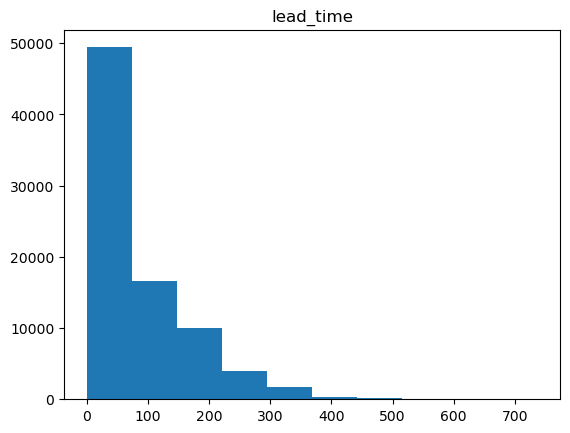

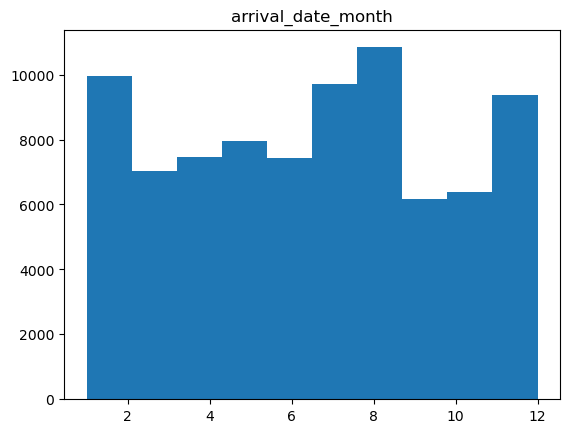

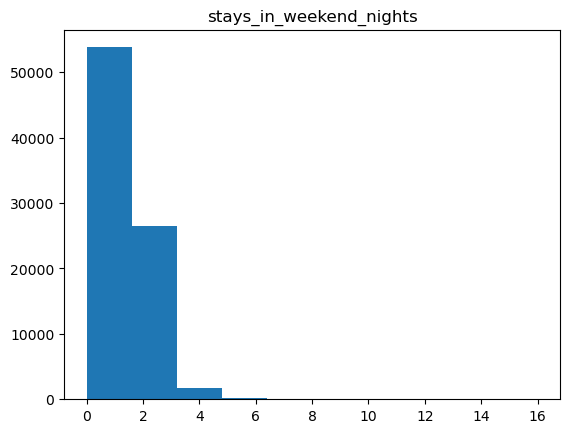

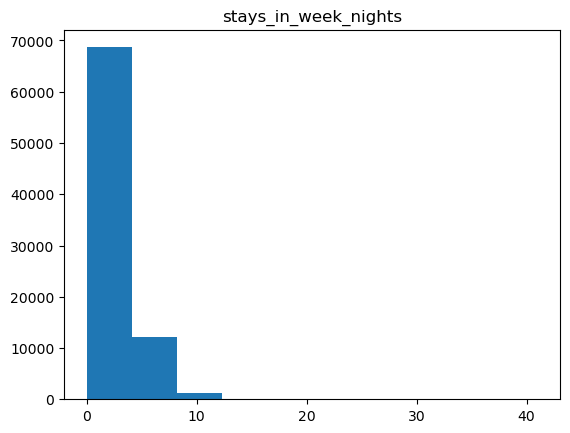

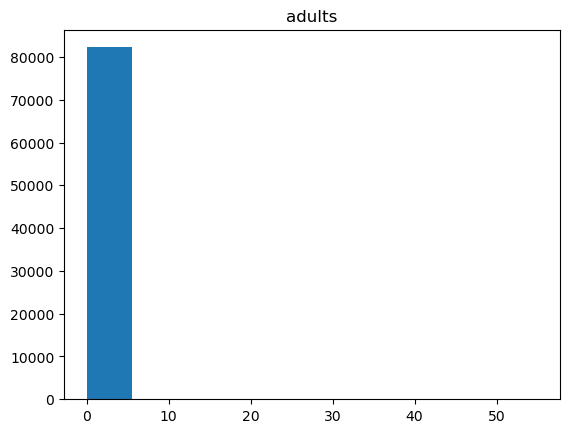

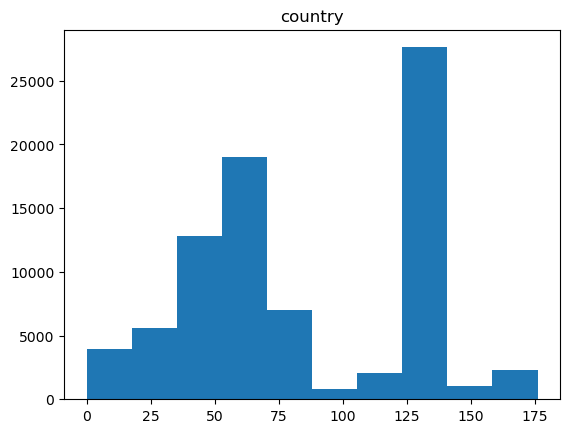

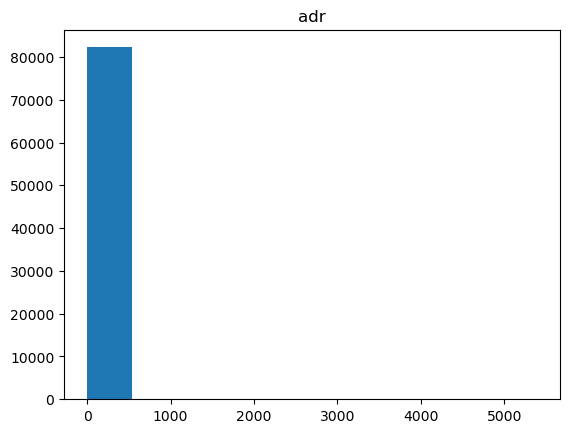

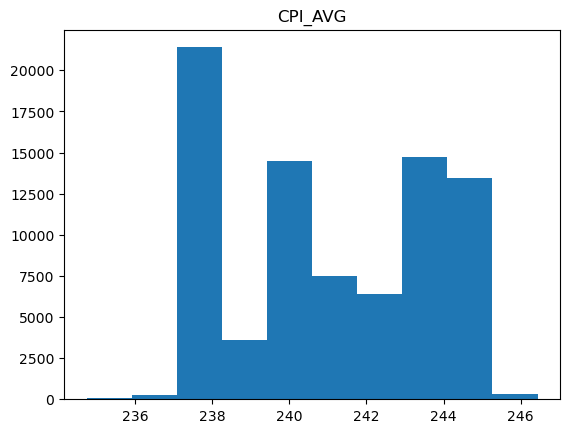

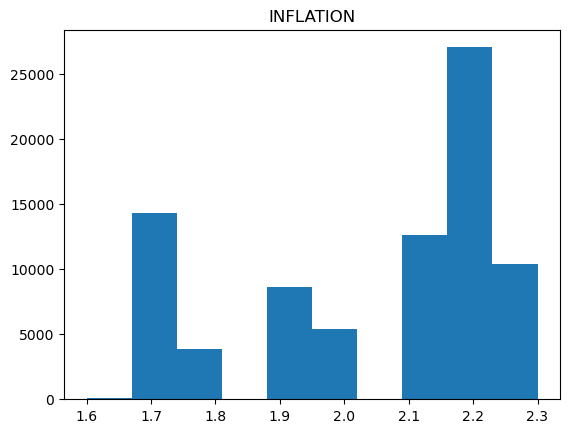

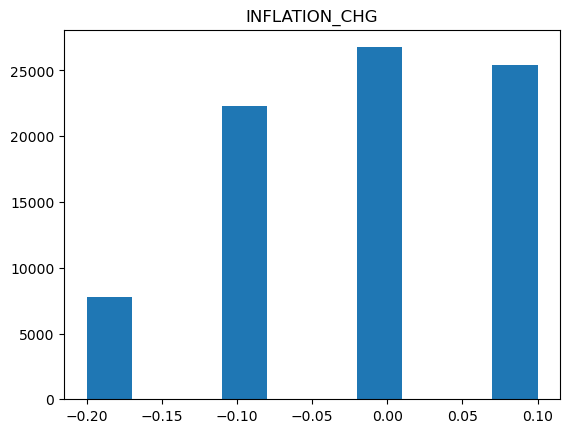

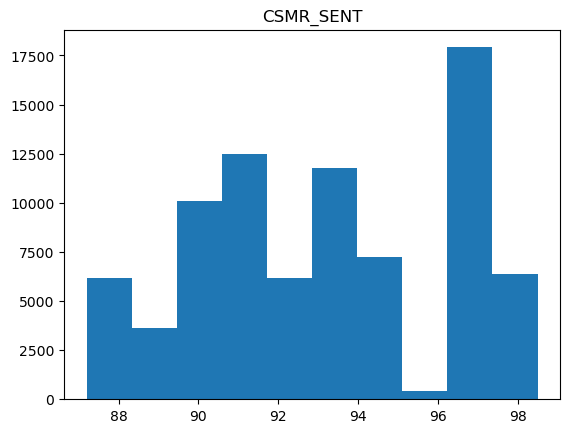

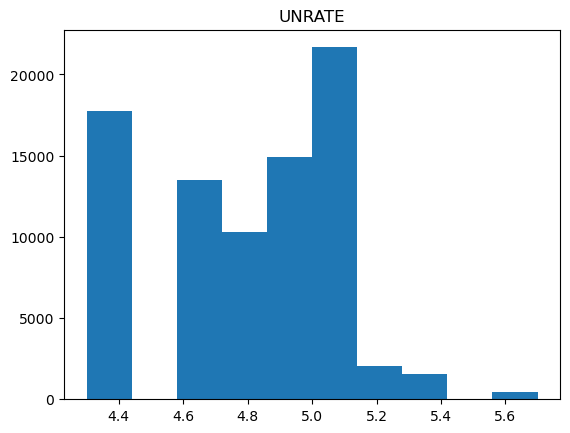

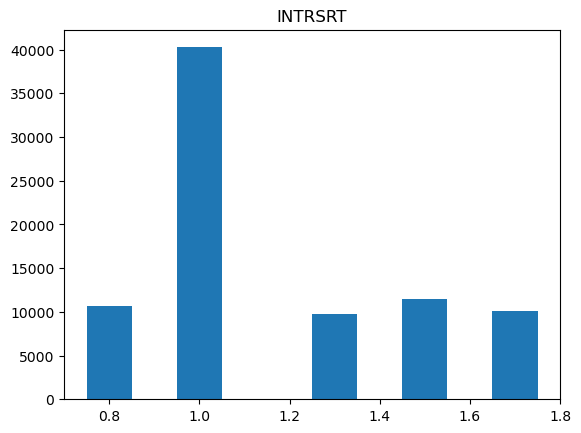

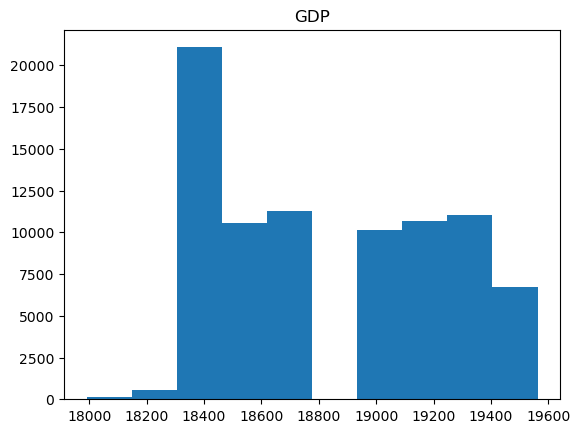

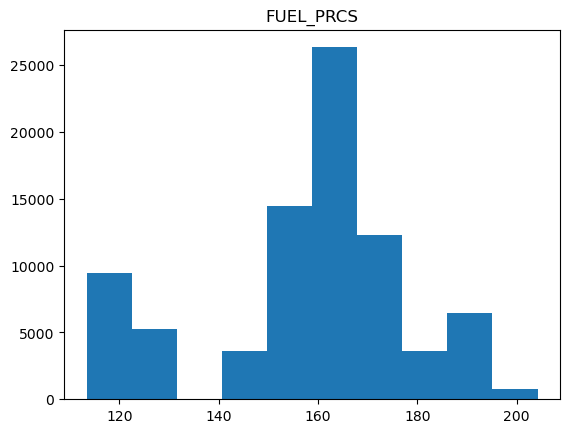

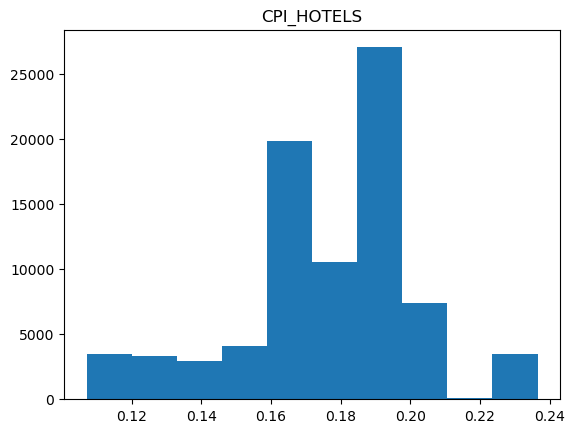

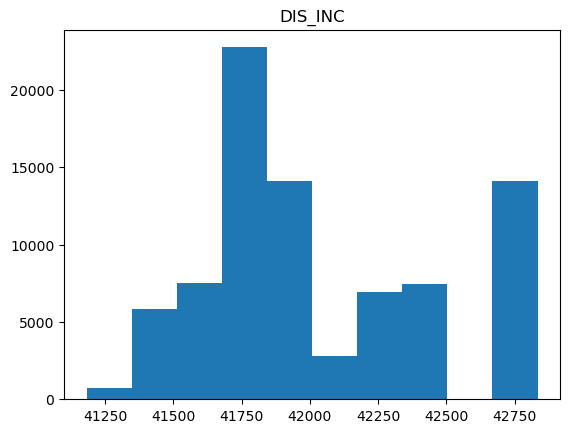

In [51]:
import matplotlib.pyplot as plt

# Loop through each column and create a separate plot for each
for column in df_to_scale_list:
    plt.figure()  # Create a new figure for each plot
    plt.hist(df_encoded[column])
    plt.title(column)
    plt.show()  # Display the plot


In [52]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler

features_to_robust = ['lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'adr', 'FUEL_PRCS']
robust_scaler = RobustScaler()
robust_scaler.fit(df_encoded[features_to_robust])
df_encoded[features_to_robust] = robust_scaler.transform(df_encoded[features_to_robust])
df_encoded.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,adr,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,2.616071,0.0,-0.5,-0.666667,0.0,135,0,-1.634347,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,6.142857,0.0,-0.5,-0.666667,0.0,135,0,-1.634347,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,-0.375000,0.0,-0.5,-0.333333,-1.0,59,0,-0.401808,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,-0.321429,0.0,-0.5,-0.333333,-1.0,59,0,-0.401808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,-0.312500,0.0,-0.5,0.000000,0.0,59,0,-0.023829,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [53]:
# Min Max Scaler

# Robust Scaler
from sklearn.preprocessing import MinMaxScaler

features_to_minmax = ['country', 'CPI_AVG', 'INFLATION', 'INFLATION_CHG', 'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP', 'DIS_INC', 'CPI_HOTELS']
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_encoded[features_to_minmax])
df_encoded[features_to_minmax] = minmax_scaler.transform(df_encoded[features_to_minmax])
df_encoded.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,adr,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,2.616071,0.0,-0.5,-0.666667,0.0,0.767045,0,-1.634347,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,6.142857,0.0,-0.5,-0.666667,0.0,0.767045,0,-1.634347,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,-0.375000,0.0,-0.5,-0.333333,-1.0,0.335227,0,-0.401808,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,-0.321429,0.0,-0.5,-0.333333,-1.0,0.335227,0,-0.401808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,-0.312500,0.0,-0.5,0.000000,0.0,0.335227,0,-0.023829,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 2. Data Visualization
- Univariate analysis
- Bivariate analysis (scatterplot)
- Multivariate analysis
- Histograms and Density PLots
- Boxplots
- Heatmaps
- Bar Plots
- Pair Plots
- Correlation Matrix
- Pairwise Correlation
- etc.


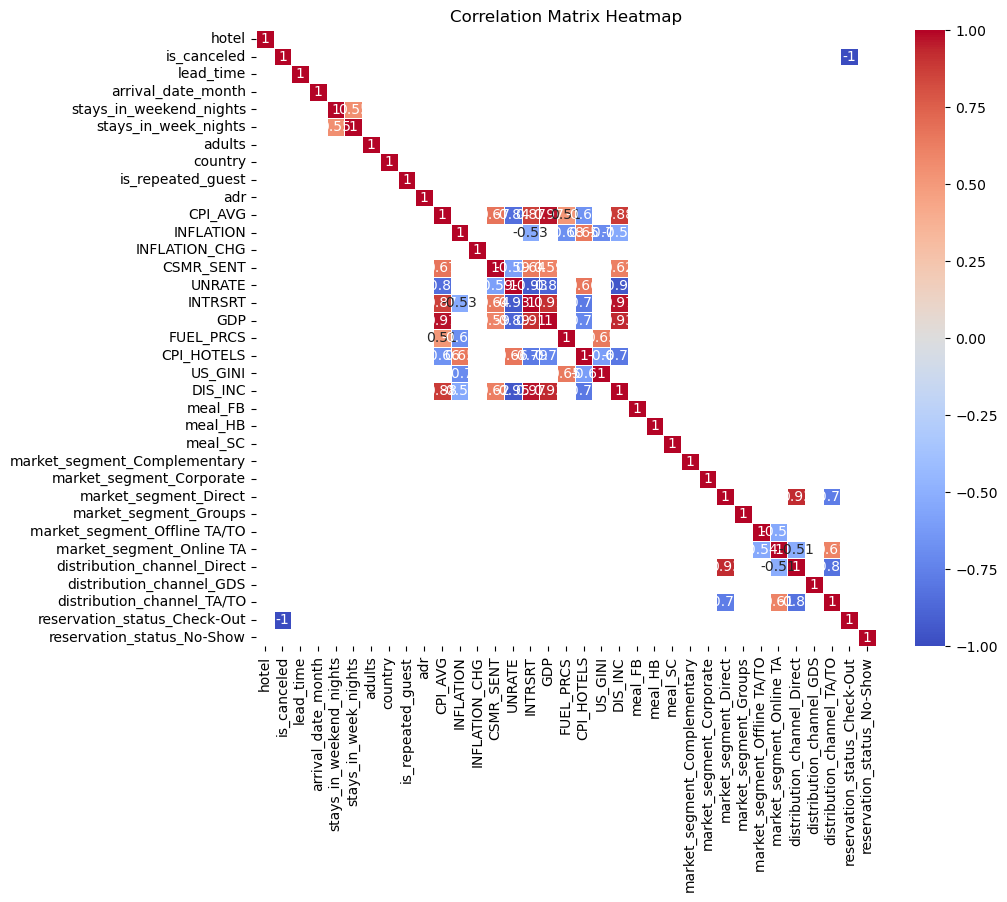

In [55]:
import seaborn as sns
correlation_matrix = df_encoded.corr()

# Filter out low correlations (absolute value < 0.5)
mask = np.abs(correlation_matrix) >= 0.5
filtered_corr = correlation_matrix[mask]

filtered_corr.dropna(how='all', axis=0, inplace=True)
filtered_corr.dropna(how='all', axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [56]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Find pairs of features with correlation greater than 0.5
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >0:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Create a DataFrame to display the results
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Sort the DataFrame by correlation in descending order
high_correlation_df = high_correlation_df.sort_values(by='Correlation', ascending=False)

# Display the table
print(high_correlation_df)


                 Feature 1                     Feature 2  Correlation
300                CPI_AVG                           GDP     0.974653
409                INTRSRT                       DIS_INC     0.973973
427                    GDP                       DIS_INC     0.931268
562  market_segment_Direct   distribution_channel_Direct     0.925890
405                INTRSRT                           GDP     0.912358
..                     ...                           ...          ...
298                CPI_AVG                        UNRATE    -0.837667
386                 UNRATE                           GDP    -0.886163
385                 UNRATE                       INTRSRT    -0.933465
390                 UNRATE                       DIS_INC    -0.948131
65             is_canceled  reservation_status_Check-Out    -1.000000

[595 rows x 3 columns]


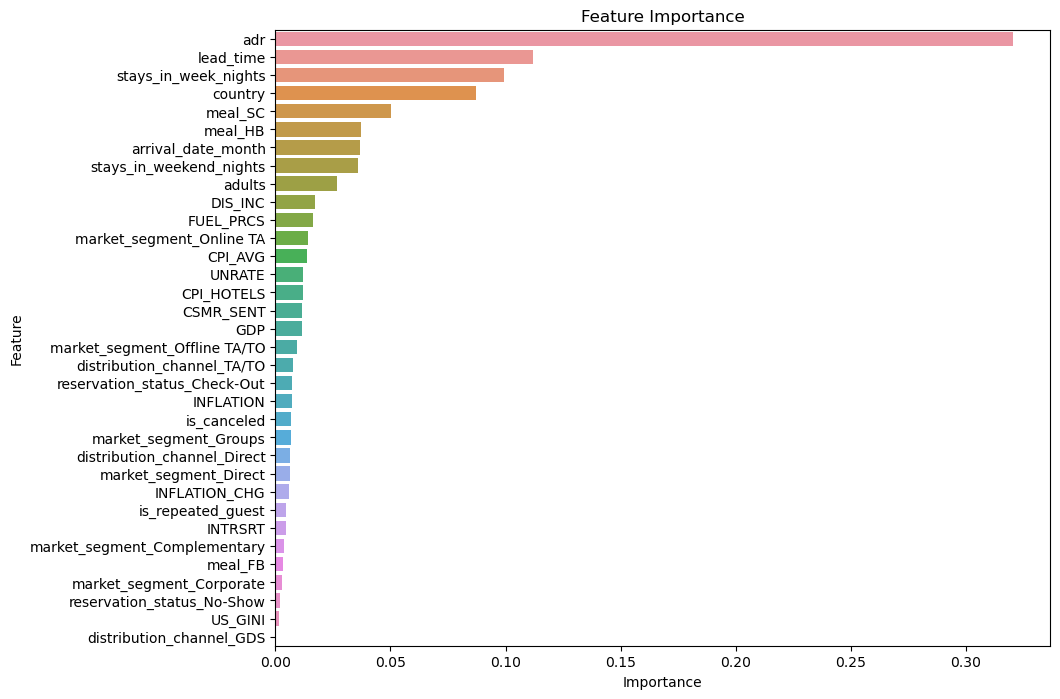

In [57]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'hotel'

# Assuming you have a DataFrame df_encoded and a target variable y
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


is_canceled                     1.000000
market_segment_Online TA        0.200545
lead_time                       0.194060
reservation_status_No-Show      0.174180
distribution_channel_TA/TO      0.147834
adr                             0.119146
country                         0.101593
INFLATION                       0.092508
stays_in_week_nights            0.078472
adults                          0.073230
hotel                           0.066893
UNRATE                          0.063949
CPI_HOTELS                      0.062442
meal_SC                         0.056935
stays_in_weekend_nights         0.052537
CSMR_SENT                       0.045727
market_segment_Groups           0.018935
arrival_date_month              0.003118
meal_HB                        -0.000846
meal_FB                        -0.001638
distribution_channel_GDS       -0.008777
INFLATION_CHG                  -0.008909
market_segment_Complementary   -0.028480
CPI_AVG                        -0.030289
US_GINI         

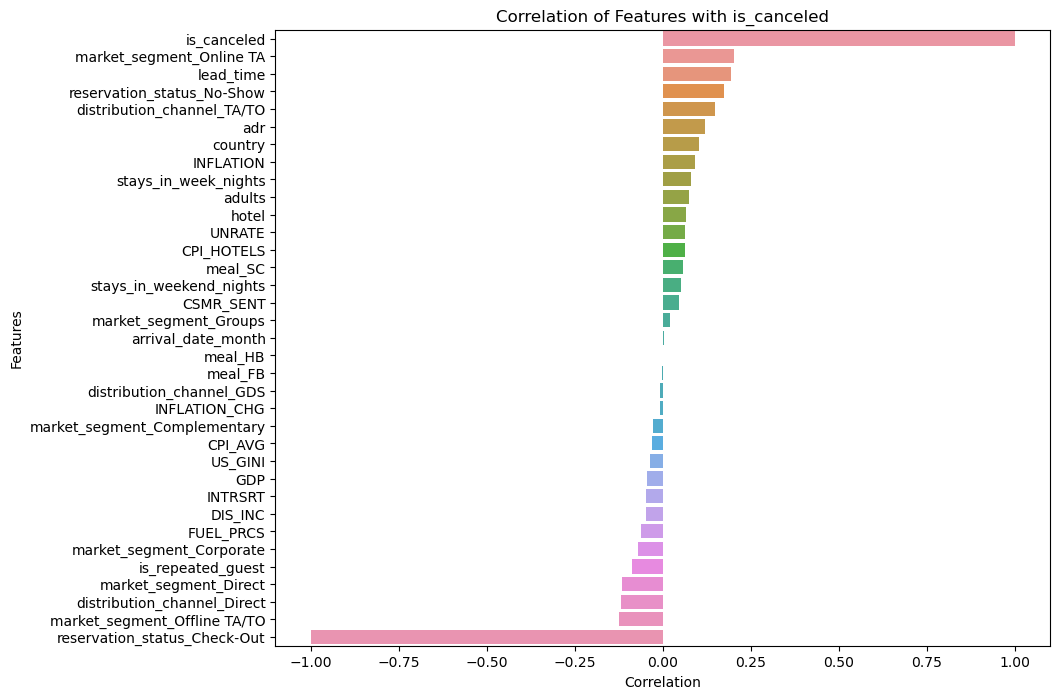

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame and is_canceled is the column of interest

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation for the specific column 'is_canceled'
correlation_with_is_canceled = correlation_matrix['is_canceled']

# Sort the correlations in descending order
correlation_with_is_canceled = correlation_with_is_canceled.sort_values(ascending=False)

# Display the correlation values
print(correlation_with_is_canceled)

# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_is_canceled.values, y=correlation_with_is_canceled.index)
plt.title('Correlation of Features with is_canceled')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

country                         1.000000
market_segment_Corporate        0.161696
is_repeated_guest               0.161003
UNRATE                          0.125449
distribution_channel_Direct     0.112174
is_canceled                     0.101593
market_segment_Direct           0.096212
market_segment_Complementary    0.079575
INFLATION_CHG                   0.068584
market_segment_Groups           0.062148
CPI_HOTELS                      0.056096
reservation_status_No-Show      0.053963
meal_FB                         0.039407
arrival_date_month              0.027358
US_GINI                         0.025954
meal_HB                         0.005709
FUEL_PRCS                       0.004391
distribution_channel_GDS        0.001368
market_segment_Offline TA/TO   -0.007031
INFLATION                      -0.007339
CSMR_SENT                      -0.042273
meal_SC                        -0.069691
adr                            -0.075849
lead_time                      -0.086535
stays_in_week_ni

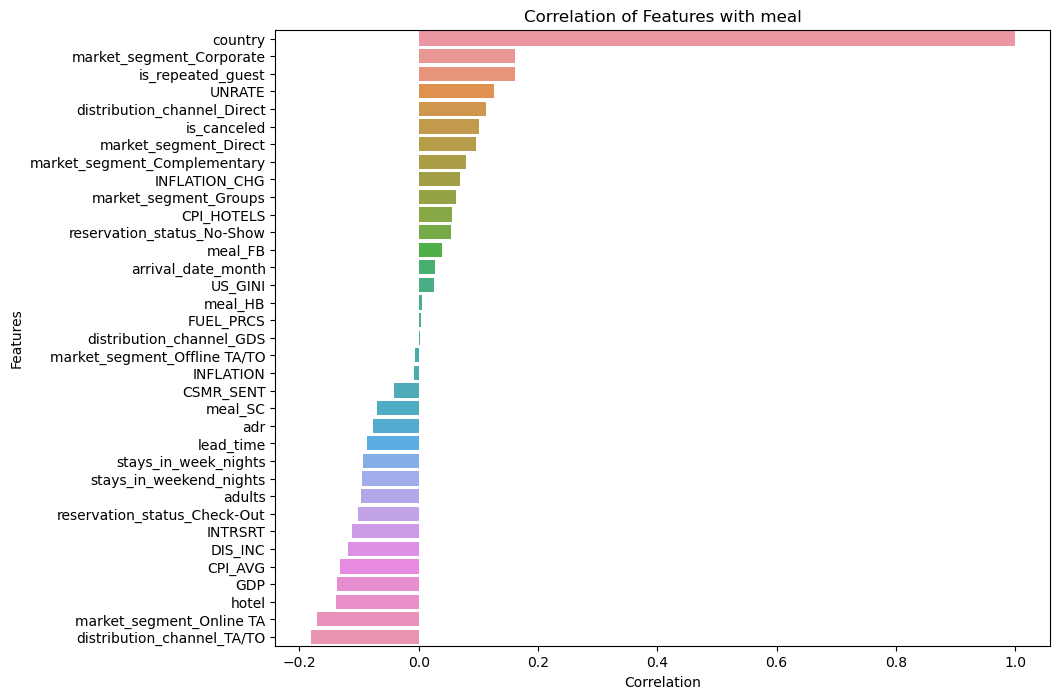

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame and is_canceled is the column of interest

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation for the specific column 'meal'
correlation_with_meal = correlation_matrix['country']

# Sort the correlations in descending order
correlation_with_meal = correlation_with_meal.sort_values(ascending=False)

# Display the correlation values
print(correlation_with_meal)

# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_meal.values, y=correlation_with_meal.index)
plt.title('Correlation of Features with meal')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_encoded is your DataFrame
correlation_matrix = df_encoded.corr()
# Set a threshold for high correlation
threshold = 0.7

# Find pairs of columns with correlation above the threshold
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print high correlation pairs
print("High correlation pairs (above threshold):")
print(high_corr_pairs)

High correlation pairs (above threshold):
[('is_canceled', 'reservation_status_Check-Out'), ('CPI_AVG', 'UNRATE'), ('CPI_AVG', 'INTRSRT'), ('CPI_AVG', 'GDP'), ('CPI_AVG', 'DIS_INC'), ('INFLATION', 'US_GINI'), ('UNRATE', 'INTRSRT'), ('UNRATE', 'GDP'), ('UNRATE', 'DIS_INC'), ('INTRSRT', 'GDP'), ('INTRSRT', 'CPI_HOTELS'), ('INTRSRT', 'DIS_INC'), ('GDP', 'CPI_HOTELS'), ('GDP', 'DIS_INC'), ('CPI_HOTELS', 'DIS_INC'), ('market_segment_Direct', 'distribution_channel_Direct'), ('market_segment_Direct', 'distribution_channel_TA/TO'), ('distribution_channel_Direct', 'distribution_channel_TA/TO')]


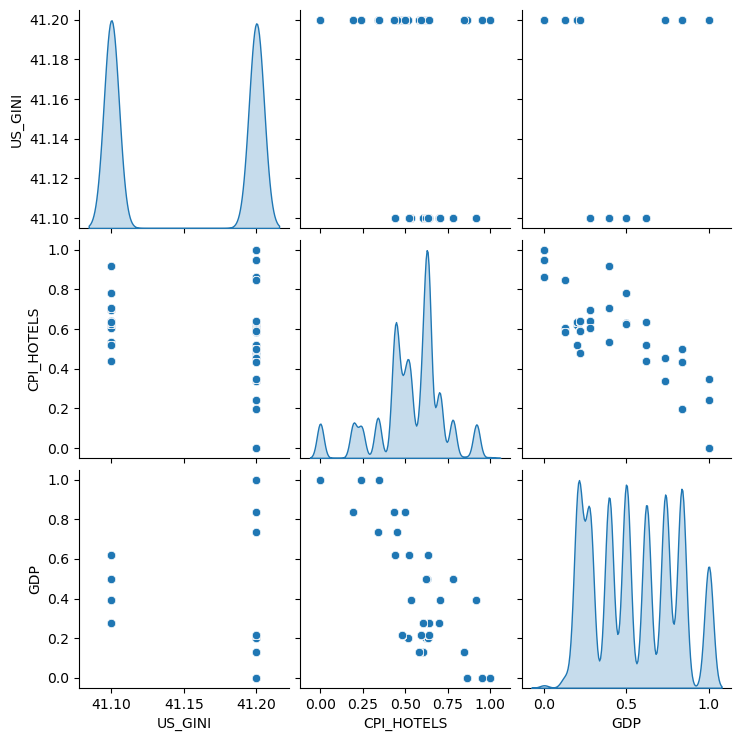

In [61]:
# Extract unique columns from high correlation pairs
high_corr_columns = list(set([col for pair in high_corr_pairs for col in pair]))

# Ensure there are at least three columns to visualize
if len(high_corr_columns) < 3:
    print("Not enough highly correlated columns to visualize.")
else:
    # Select three highly correlated columns (or more if you want)
    columns_to_visualize = high_corr_columns[:3]  # You can adjust the number of columns to visualize

    # Create a pair plot for the selected columns
    sns.pairplot(df_encoded[columns_to_visualize], diag_kind='kde')
    plt.show()


## 3. Feature Engineering
- Creating new features
- Transforming existing features

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming df_encoded is your DataFrame and is_canceled is the target variable
# Prepare the data
X = df_encoded.drop(columns=['is_canceled'])
y = df_encoded['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11811
           1       1.00      1.00      1.00      4643

    accuracy                           1.00     16454
   macro avg       1.00      1.00      1.00     16454
weighted avg       1.00      1.00      1.00     16454


Confusion Matrix:
[[11811     0]
 [    0  4643]]


In [58]:
df_encoded.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country',
       'is_repeated_guest', 'adr', 'CPI_AVG', 'INFLATION', 'INFLATION_CHG',
       'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP', 'FUEL_PRCS', 'CPI_HOTELS',
       'US_GINI', 'DIS_INC', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object')

# IS_CANCELED

y-Target

Accuracy: 0.91
Precision: 0.93
Recall: 0.73
F1 Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11811
           1       0.93      0.73      0.82      4643

    accuracy                           0.91     16454
   macro avg       0.91      0.86      0.88     16454
weighted avg       0.91      0.91      0.90     16454


Confusion Matrix:
[[11541   270]
 [ 1237  3406]]


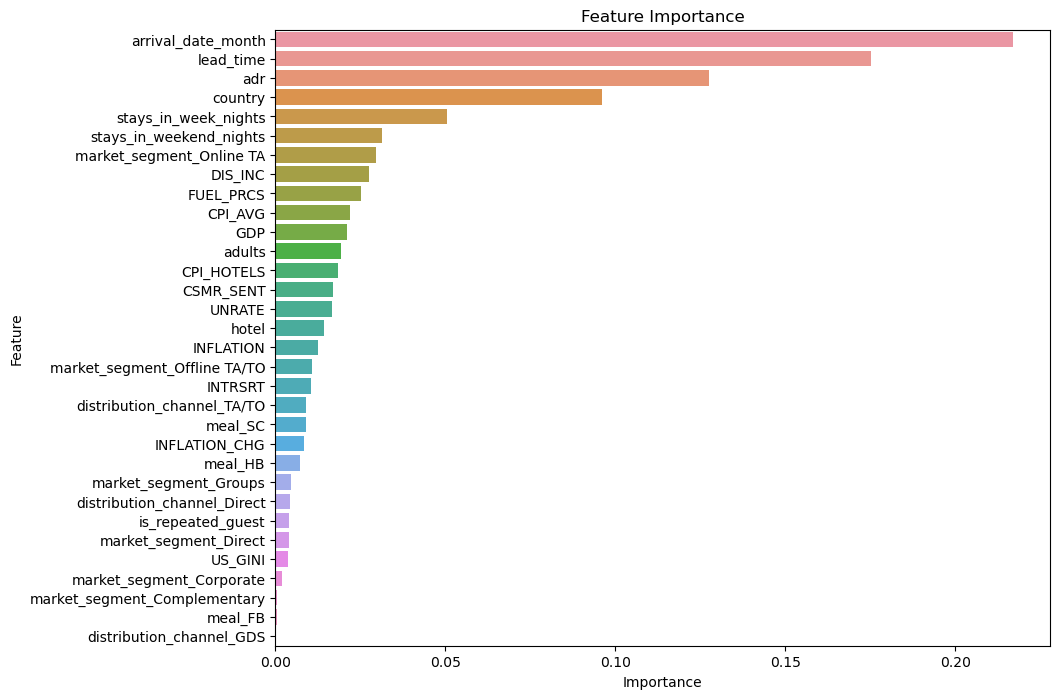

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming df_encoded is your DataFrame and is_canceled is the target variable
# Prepare the data
X = df_encoded.drop(columns=['is_canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'])
y = df_encoded['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


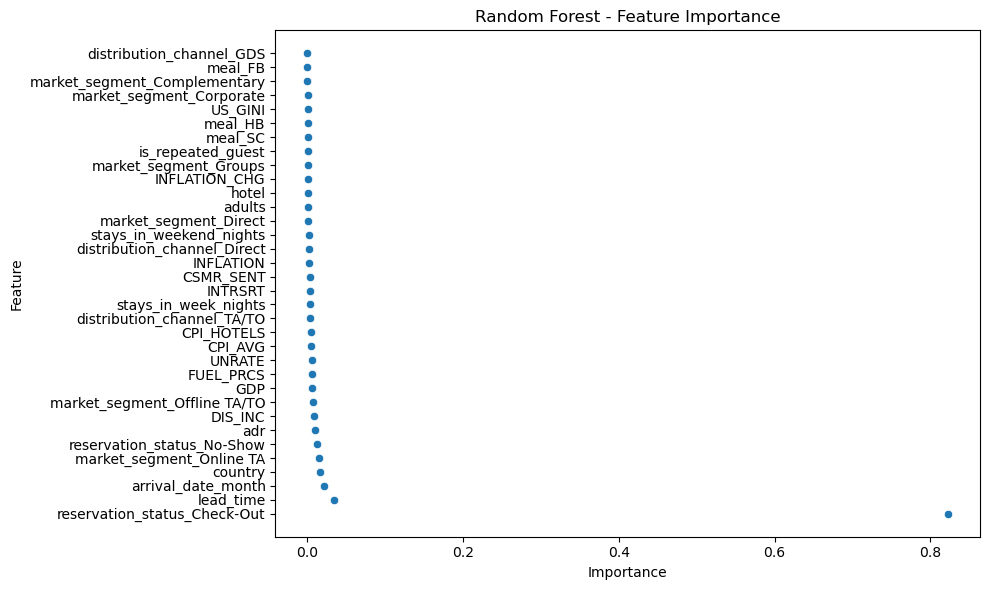

In [64]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing target, separate target from predictors
numerical_cols = [cname for cname in df_encoded.columns if
                df_encoded[cname].dtype in ['int64', 'float64']]

X = df_encoded[numerical_cols].copy()

X.dropna(axis=0, subset=['is_canceled'], inplace=True)
y = X['is_canceled']
X.drop(['is_canceled'], axis=1, inplace=True)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X, y)

# Get feature importances from the model
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
feature_names = X.columns[indices]  # Use actual feature names from DataFrame

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importance")
sns.scatterplot(x=importances[indices], y=range(X.shape[1]))
plt.yticks(range(X.shape[1]), feature_names)  # Use feature names as y-axis labels
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


0.9017867995624165 0.7400387680379066 0.8096135721017907 0.09821320043758357


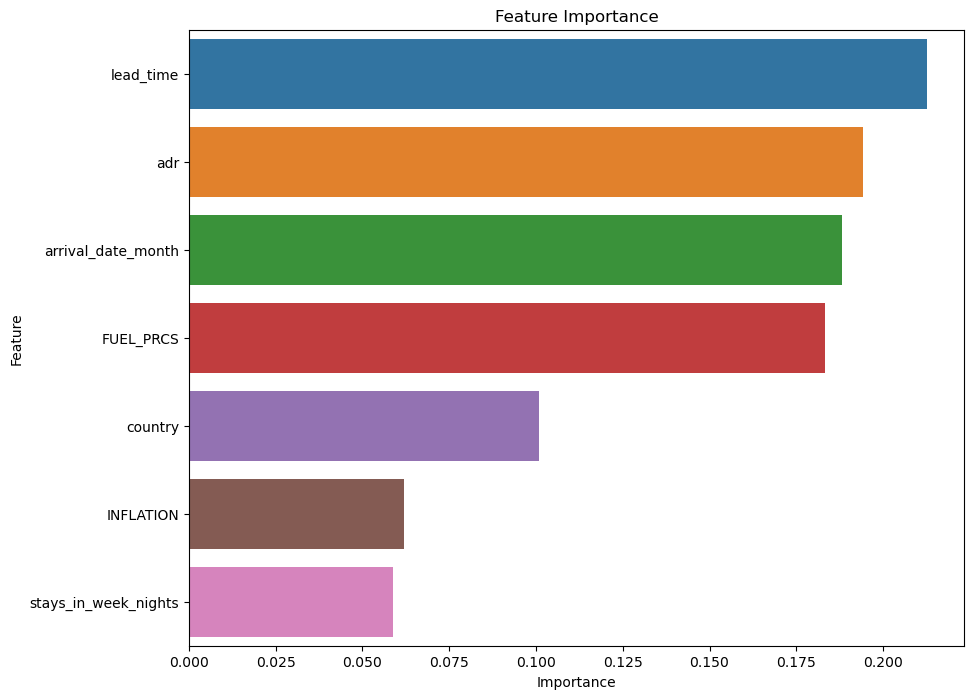

In [65]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'is_canceled'

# Assuming you have a DataFrame df_encoded and a target variable y
predictors = [
    'country', 'FUEL_PRCS', 'lead_time', 'adr', "arrival_date_month", 'stays_in_week_nights', 'INFLATION'
]
# X = df_encoded.drop(columns=[target_variable])
X = df_encoded[predictors]
y = df_encoded[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
# model = SVC()
# model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# # Get feature importances
importances = model.feature_importances_

# # Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# # Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(acc, rec, f1, mse)
# print(mse)

# # Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# TRANSFORM 

# COUNTRY

y-Target

Mean Squared Error (MSE): 0.05
R-squared (R2): 0.17


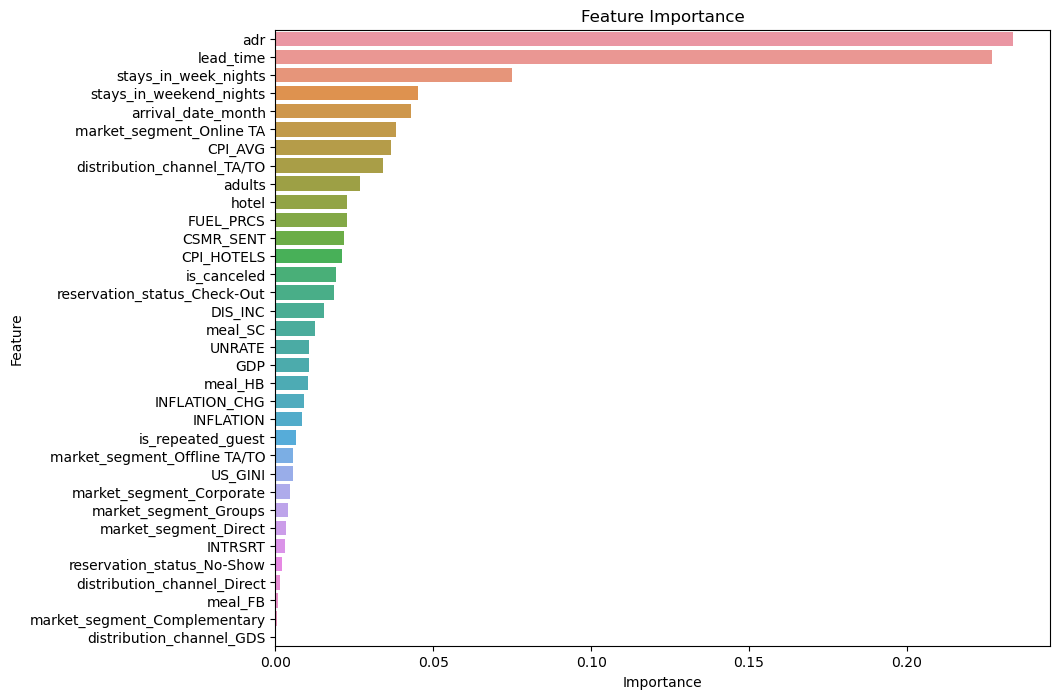

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame and lead_time is the target variable
# Prepare the data
X = df_encoded.drop(columns=['country'])
y = df_encoded["country"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Mean Squared Error (MSE): 0.07
R-squared (R2): -0.02


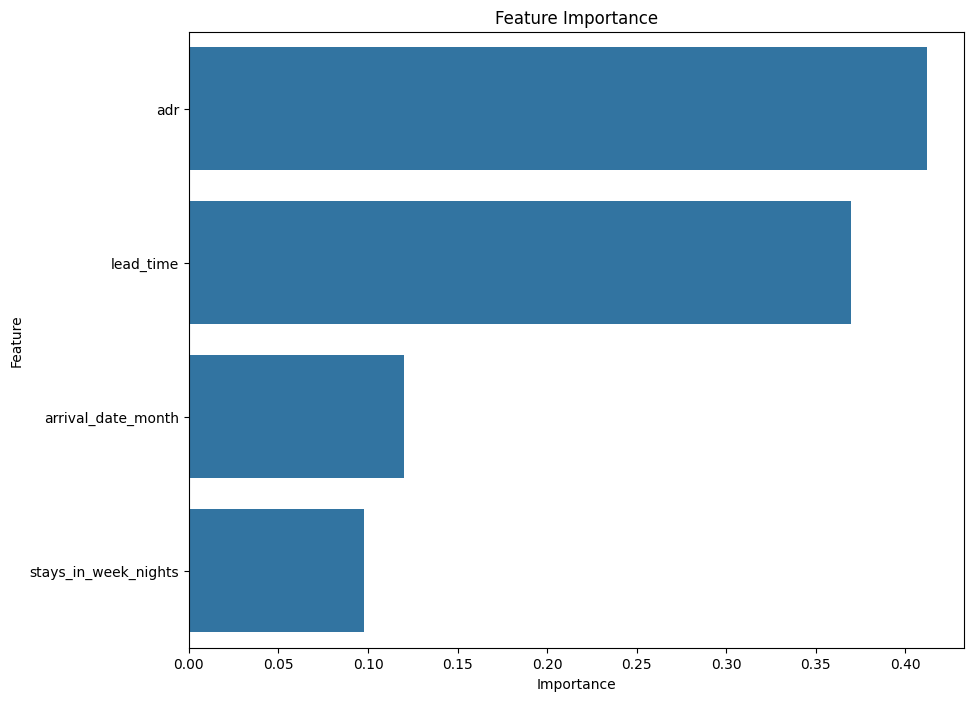

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_encoded is your DataFrame and adr is the target variable
target_variable = 'country'
predictors = ['arrival_date_month', 'adr', 'lead_time', 'stays_in_week_nights']

X = df_encoded[predictors]
y = df_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


0.2787771970341558 0.2787771970341558 0.2787771970341558 3202.2486325513555


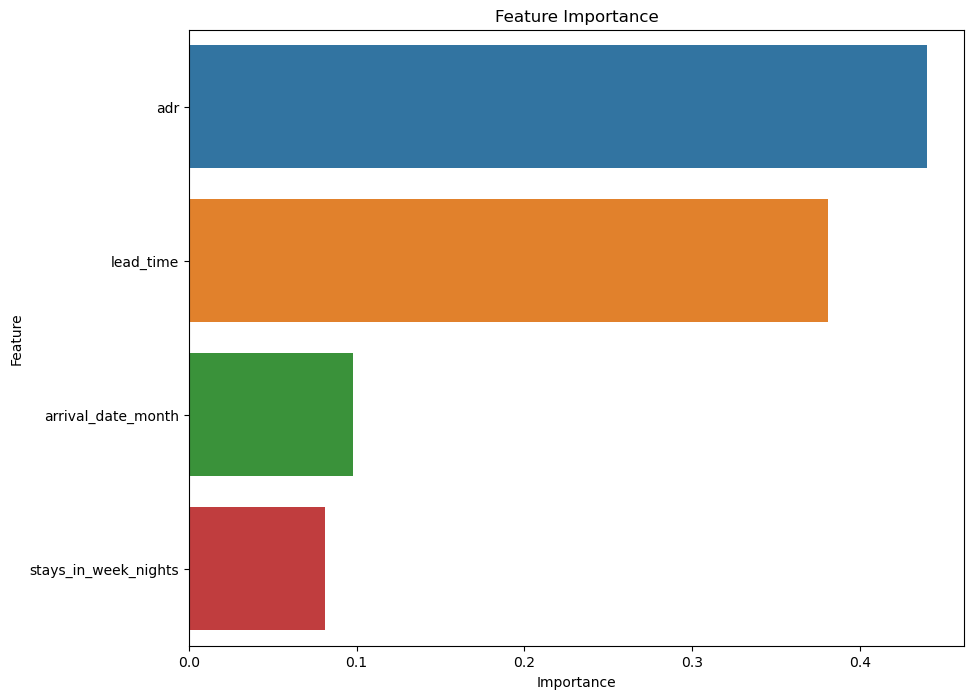

In [67]:
# comment felix: country is a classifier, not a continuous variable - if we use a regressor the output would be a number between 0 and 1 and it cannot be interpreted as a country name (which we want). If we use a classifier we get a number output that is mapped back to a country name. So, same as for is_cancelled, we use a Random Forrest Classifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Assuming df_encoded is your DataFrame and adr is the target variable
target_variable = 'country_name'
predictors = ['arrival_date_month', 'adr', 'lead_time', 'stays_in_week_nights']

#if this doesnt work, label encode country first
X = df_encoded[predictors]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['country_name'])
# y = df[target_variable] #NOT robust scaled encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestClassifier(random_state=42) #instead of regressor
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred = model.predict(X_test)
acc = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
mse = mean_squared_error(y_test, y_pred)



print(acc, rec, f1, mse)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [70]:
country_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
pred = y_pred[1]
pred_name = country_mapping[pred]
pred_name

'NOR'

## 4. Summary and Next Steps
- Key insights from the analysis
- Potential next steps for modeling